<a href="https://www.kaggle.com/code/hadikp/titanic-survival-prediction?scriptVersionId=249455345" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

os.listdir("/kaggle/input/titanic/")


['train.csv', 'test.csv', 'gender_submission.csv']

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")



In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

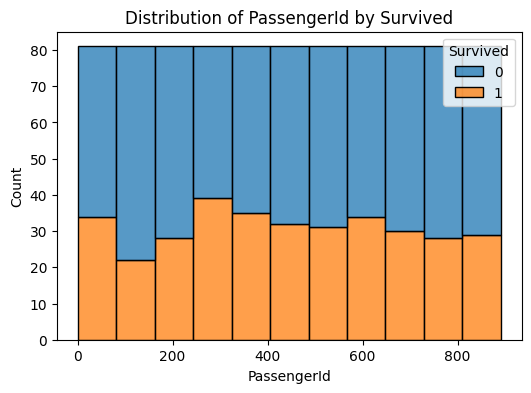

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

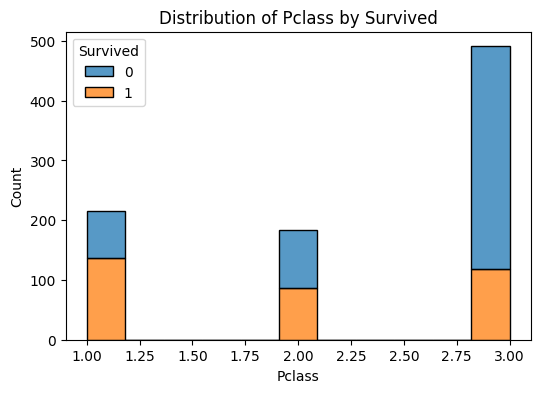

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

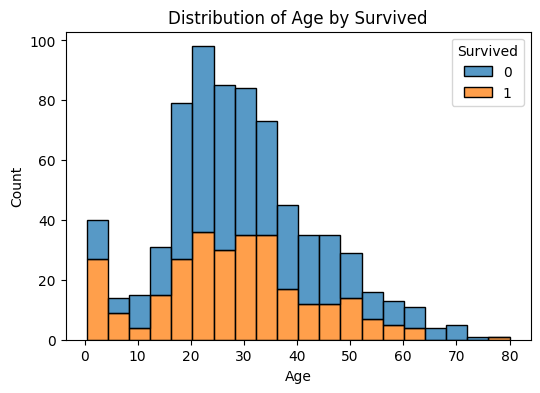

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

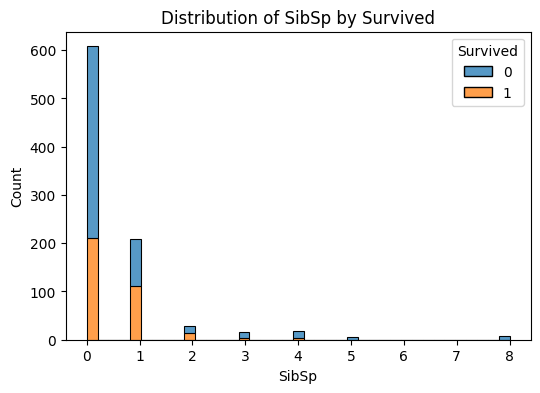

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

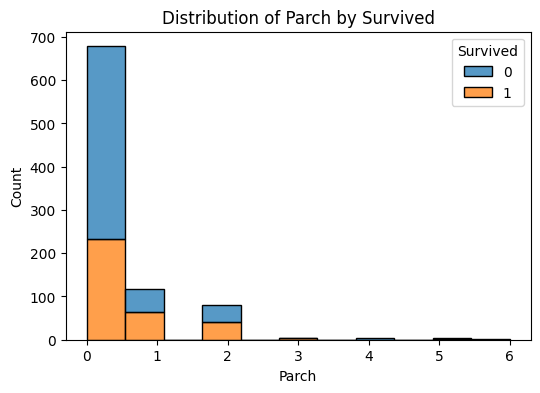

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

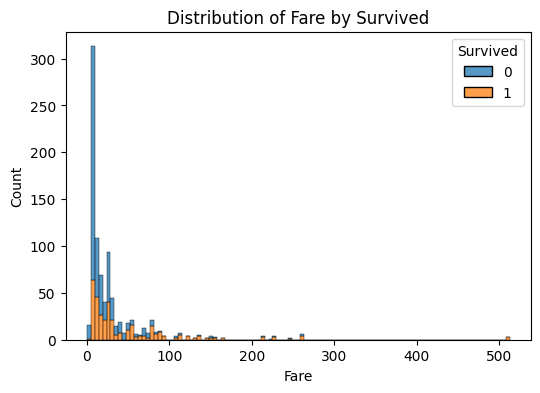

In [8]:
print(train.columns)

for i in train.columns:
    if i != 'Survived' and train[i].dtype in ['int64', 'float64']:  # only for numeric columns
        plt.figure(figsize=(6, 4))
        sns.histplot(data=train, x=i, hue='Survived', kde=False, multiple='stack')
        plt.title(f'Distribution of {i} by Survived')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

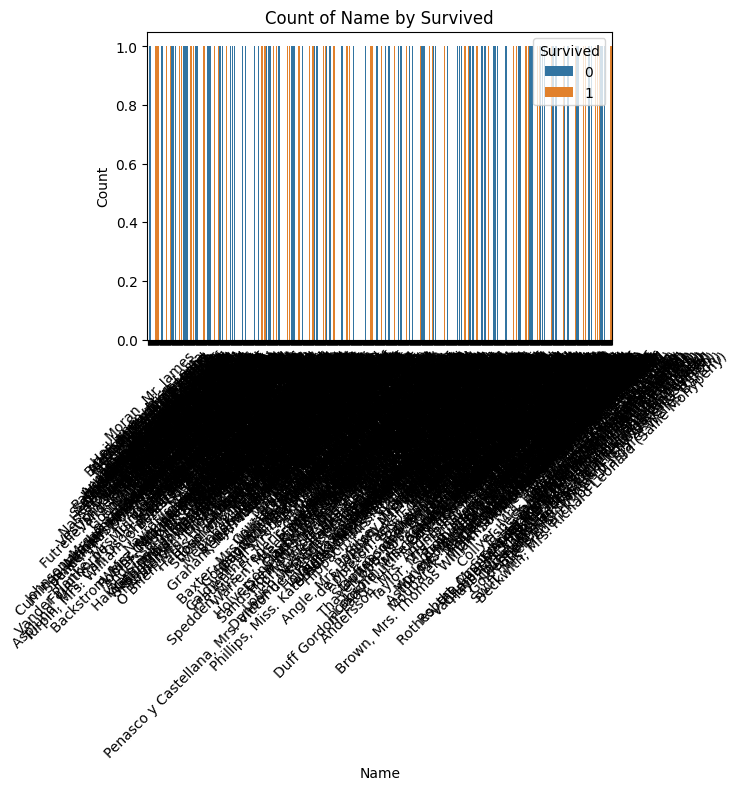

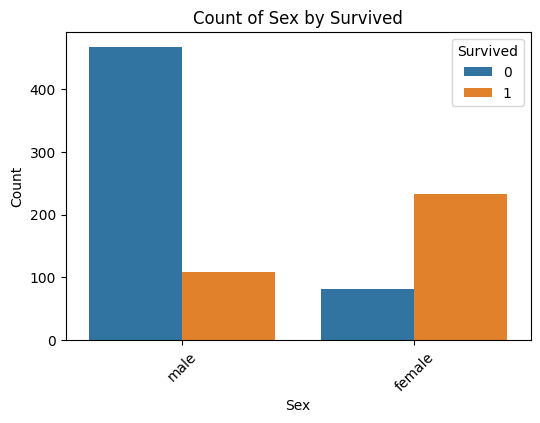

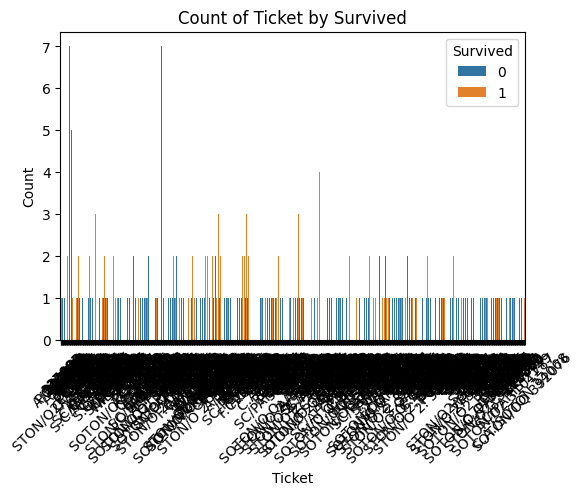

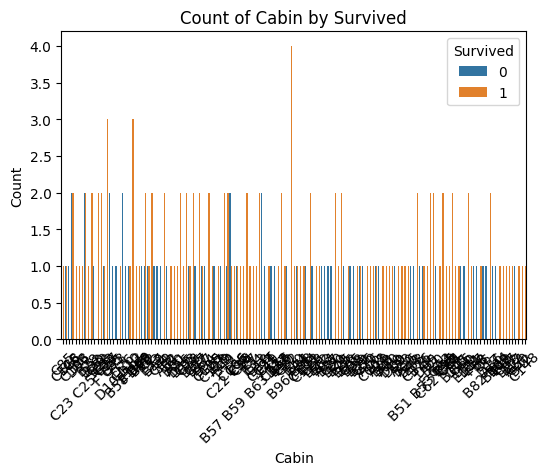

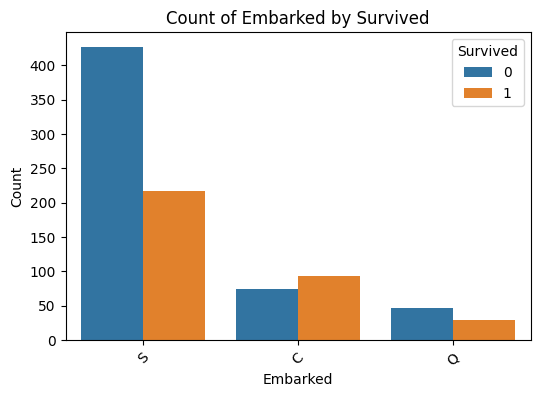

In [9]:
for i in train.columns:
    if i != 'Survived' and train[i].dtype == 'object':  # for categorical columns
        plt.figure(figsize=(6, 4))
        sns.countplot(data=train, x=i, hue='Survived')
        plt.title(f'Count of {i} by Survived')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [10]:
x_train_1 = train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
x_train_1 = x_train_1.dropna()
print(x_train_1)




     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0         3    male  22.0      1      0   7.2500        S         0
1         1  female  38.0      1      0  71.2833        C         1
2         3  female  26.0      0      0   7.9250        S         1
3         1  female  35.0      1      0  53.1000        S         1
4         3    male  35.0      0      0   8.0500        S         0
..      ...     ...   ...    ...    ...      ...      ...       ...
885       3  female  39.0      0      5  29.1250        Q         0
886       2    male  27.0      0      0  13.0000        S         0
887       1  female  19.0      0      0  30.0000        S         1
889       1    male  26.0      0      0  30.0000        C         1
890       3    male  32.0      0      0   7.7500        Q         0

[712 rows x 8 columns]


In [11]:
x_train_1['FamilySize'] = x_train_1['SibSp'] + x_train_1['Parch'] + 1
x_train_1['IsAlone'] = (x_train_1['FamilySize'] == 1).astype(int)
x_train_1['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)



test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [12]:
y_train = x_train_1['Survived']
x_train = x_train_1[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone','Title']]

print(x_train)

     Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         3    male  22.0      1      0   7.2500        S           2   
1         1  female  38.0      1      0  71.2833        C           2   
2         3  female  26.0      0      0   7.9250        S           1   
3         1  female  35.0      1      0  53.1000        S           2   
4         3    male  35.0      0      0   8.0500        S           1   
..      ...     ...   ...    ...    ...      ...      ...         ...   
885       3  female  39.0      0      5  29.1250        Q           6   
886       2    male  27.0      0      0  13.0000        S           1   
887       1  female  19.0      0      0  30.0000        S           1   
889       1    male  26.0      0      0  30.0000        C           1   
890       3    male  32.0      0      0   7.7500        Q           1   

     IsAlone Title  
0          0    Mr  
1          0   Mrs  
2          1  Miss  
3          0   Mrs  
4          1    Mr

In [13]:

x_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone','Title']]
print(x_test)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked  FamilySize  \
0         3    male  34.5      0      0    7.8292        Q           1   
1         3  female  47.0      1      0    7.0000        S           2   
2         2    male  62.0      0      0    9.6875        Q           1   
3         3    male  27.0      0      0    8.6625        S           1   
4         3  female  22.0      1      1   12.2875        S           3   
..      ...     ...   ...    ...    ...       ...      ...         ...   
413       3    male   NaN      0      0    8.0500        S           1   
414       1  female  39.0      0      0  108.9000        C           1   
415       3    male  38.5      0      0    7.2500        S           1   
416       3    male   NaN      0      0    8.0500        S           1   
417       3    male   NaN      1      1   22.3583        C           3   

     IsAlone   Title  
0          1      Mr  
1          0     Mrs  
2          1      Mr  
3          1      M

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [14]:
# x_train = train.dropna()
# print(x_train)

In [15]:
col = (x_train.dtypes=="object")
obj_cols = list(col[col].index)
print(f"Columns with categorical data = {obj_cols}")

Columns with categorical data = ['Sex', 'Embarked', 'Title']


In [16]:
from sklearn.preprocessing import OrdinalEncoder

num_x_tr = x_train.copy()
num_x_tst = x_test.copy()

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

num_x_tr[obj_cols] =  ord_enc.fit_transform(x_train[obj_cols])
num_x_tst[obj_cols] =  ord_enc.transform(x_test[obj_cols])

print(num_x_tr)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone  \
0         3  1.0  22.0      1      0   7.2500       2.0           2        0   
1         1  0.0  38.0      1      0  71.2833       0.0           2        0   
2         3  0.0  26.0      0      0   7.9250       2.0           1        1   
3         1  0.0  35.0      1      0  53.1000       2.0           2        0   
4         3  1.0  35.0      0      0   8.0500       2.0           1        1   
..      ...  ...   ...    ...    ...      ...       ...         ...      ...   
885       3  0.0  39.0      0      5  29.1250       1.0           6        0   
886       2  1.0  27.0      0      0  13.0000       2.0           1        1   
887       1  0.0  19.0      0      0  30.0000       2.0           1        1   
889       1  1.0  26.0      0      0  30.0000       0.0           1        1   
890       3  1.0  32.0      0      0   7.7500       1.0           1        1   

     Title  
0     12.0  
1     13.0  


In [17]:
# num_x_tr['Sex']

In [18]:
x_train.isnull().any()

missing = [i for i in x_train.columns if x_train[i].isnull().any()]
print(f"Columns with missing values = {missing}")

Columns with missing values = []


In [19]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy='mean')
# imp_x_train = pd.DataFrame(my_imputer.fit_transform(x_train))
imp_x_test = pd.DataFrame(my_imputer.fit_transform(num_x_tst))

# imp_x_train.columns = x_train.columns
imp_x_test.columns = x_test.columns



In [20]:
print(imp_x_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked  FamilySize  \
0       3.0  1.0  34.50000    0.0    0.0    7.8292       1.0         1.0   
1       3.0  0.0  47.00000    1.0    0.0    7.0000       2.0         2.0   
2       2.0  1.0  62.00000    0.0    0.0    9.6875       1.0         1.0   
3       3.0  1.0  27.00000    0.0    0.0    8.6625       2.0         1.0   
4       3.0  0.0  22.00000    1.0    1.0   12.2875       2.0         3.0   
..      ...  ...       ...    ...    ...       ...       ...         ...   
413     3.0  1.0  30.27259    0.0    0.0    8.0500       2.0         1.0   
414     1.0  0.0  39.00000    0.0    0.0  108.9000       0.0         1.0   
415     3.0  1.0  38.50000    0.0    0.0    7.2500       2.0         1.0   
416     3.0  1.0  30.27259    0.0    0.0    8.0500       2.0         1.0   
417     3.0  1.0  30.27259    1.0    1.0   22.3583       0.0         3.0   

     IsAlone  Title  
0        1.0   12.0  
1        0.0   13.0  
2        1.0   12.0  

In [21]:
# print(num_x_tst)

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100,max_depth=6, random_state=1)
# model.fit(num_x_tr,y_train)

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=500, learning_rate=0.06, use_label_encoder=False, eval_metric='logloss')
model.fit(num_x_tr, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.06, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [24]:
from sklearn.metrics import mean_absolute_error

# Predict on training data
train_preds = model.predict(num_x_tr)


from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix, classification_report

# Training accuracy
print("Training Accuracy:", accuracy_score(y_train, train_preds))

# MAE (mean absolute error) — just for consistency with your previous code
print("Training MAE:", mean_absolute_error(y_train, train_preds))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_train, train_preds))

# Classification Report
print("Classification Report:\n", classification_report(y_train, train_preds))


Training Accuracy: 0.9719101123595506
Training MAE: 0.028089887640449437
Confusion Matrix:
 [[421   3]
 [ 17 271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       424
           1       0.99      0.94      0.96       288

    accuracy                           0.97       712
   macro avg       0.98      0.97      0.97       712
weighted avg       0.97      0.97      0.97       712



In [25]:
pred = model.predict(imp_x_test)


In [26]:
print(pred)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0]


In [27]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': test['PassengerId'].astype(int),
                       'Survived': (pred)})
output.to_csv('submission.csv', index=False)

In [28]:
df = pd.read_csv("submission.csv")
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
